# Base
## Estimation of Obesity Levels Based On Eating Habits and Physical Condition

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition.

## Perguntas?
- Metas mínimas para manter qualidade de vida (atividade física, alimentação, consumo de bebidas, etc)
- Quais fatores mais contribuem para o desenvolvimento da obesidade (por exemplo, histórico familiar, consumo de alimentos calóricos, ou hábitos de transporte)?
- Identificar grupos padrões de comportamento similares em relação à alimentação, atividade física, uso de tecnologia, nível de obesidade 

### Dicionario:

- Gender: Gênero do indivíduo.
- Age: Idade do indivíduo.
- Height: Altura do indivíduo (em metros).
- Weight: Peso do indivíduo (em quilogramas).
- FAVC: Frequent consumption of high caloric food (Consumo frequente de alimentos calóricos).
- FCVC: Frequency of consumption of vegetables (Frequência de consumo de vegetais).
- NCP: Number of main meals per day (Número de refeições principais por dia).
- CAEC: Consumption of food between meals (Consumo de alimentos entre as refeições).
- SMOKE: Smoking habit (Hábito de fumar).
- CH2O: Daily water consumption (Consumo diário de água).
- SCC: Self-control of calorie intake (Controle próprio de ingestão calórica).
- FAF: Physical activity frequency (Frequência de atividade física).
- TUE: Time spent using electronic devices (Tempo de uso de dispositivos eletrônicos).
- CALC: Alcohol consumption frequency (Frequência de consumo de álcool).
- MTRANS: Mode of transportation (Modo de transporte).
- NObeyesdad: Obesity level (Nível de obesidade).

## Importando bibliotecas e base de dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('../projeto_datasicence_coderhouse/dados/ObesityDataSet_raw_and_data_sinthetic.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
# renomeando as colunas
df.columns = ['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
       'Frequent consumption of high caloric food', 'Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of food between meals', 'Smoke', 'Consumption of water daily', 'Calories consumption monitoring', 'Physical activity frequency', 'Time using technology devices',
       'Consumption of alcohol', 'Transportation used', 'Obesity']
df.head()

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Data Wrangling

In [4]:
# Validando valores nulos
df.isnull().sum()

Gender                                       0
Age                                          0
Height                                       0
Weight                                       0
Family History with Overweight               0
Frequent consumption of high caloric food    0
Frequency of consumption of vegetables       0
Number of main meals                         0
Consumption of food between meals            0
Smoke                                        0
Consumption of water daily                   0
Calories consumption monitoring              0
Physical activity frequency                  0
Time using technology devices                0
Consumption of alcohol                       0
Transportation used                          0
Obesity                                      0
dtype: int64

In [5]:
# validação e tratamento de valores duplicados
print(f'Quantidade de duplicados: {df.duplicated().sum()}')
df.drop_duplicates(inplace=True)
print(f'Quantidade de duplicados: {df.duplicated().sum()}')

Quantidade de duplicados: 24
Quantidade de duplicados: 0


In [6]:
df.shape

(2087, 17)

In [7]:
# primeiras manipulações

df['Height'] = df['Height'].apply(lambda x: x * 100)  # convertendo a altura para centímetros
df['Height'] = df['Height'].round(1)
df['Weight'] = df['Weight'].round(1)
df['Age'] = df['Age'].round(0)
df.head()

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,152.0,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,180.0,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,180.0,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,178.0,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Family History with Overweight',
       'Frequent consumption of high caloric food',
       'Frequency of consumption of vegetables', 'Number of main meals',
       'Consumption of food between meals', 'Smoke',
       'Consumption of water daily', 'Calories consumption monitoring',
       'Physical activity frequency', 'Time using technology devices',
       'Consumption of alcohol', 'Transportation used', 'Obesity'],
      dtype='object')

In [9]:
df1 = df.copy() # nesse df trabalharemos sem a transformação das variáveis qualitativas
df2 = df.copy() # nesse df trabalharemos com a transformação das variáveis qualitativas

In [10]:
### Transformando Variáveis Qualitativas em Quantitativas

df2['Smoker'] = df['Smoke'].map({'no': 0, 'yes': 1})
df2['Alcohol'] = df['Consumption of alcohol'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
df2['Food Bt Meals'] = df['Consumption of food between meals'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
df2['Mobility'] = df['Transportation used'].map({'Automobile': 0, 'Motorbike': 0, 'Public_Transportation': 0.5, 'Bike': 1, 'Walking': 1}) # nível de atividade física para deslocamento
df2['Obesity F'] = df['Family History with Overweight'].map({'no': 0, 'yes': 1})
df2['Bad Food'] = df['Frequent consumption of high caloric food'].map({'no': 0, 'yes': 1}) # "Frequent consumption of high caloric food between meals"
df2['Calories Control'] = df['Calories consumption monitoring'].map({'no': 0, 'yes': 1}) # "Self control of eating habits"
df2.head()

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,...,Consumption of alcohol,Transportation used,Obesity,Smoker,Alcohol,Food Bt Meals,Mobility,Obesity F,Bad Food,Calories Control
0,Female,21.0,162.0,64.0,yes,no,2.0,3.0,Sometimes,no,...,no,Public_Transportation,Normal_Weight,0,0,1,0.5,1,0,0
1,Female,21.0,152.0,56.0,yes,no,3.0,3.0,Sometimes,yes,...,Sometimes,Public_Transportation,Normal_Weight,1,1,1,0.5,1,0,1
2,Male,23.0,180.0,77.0,yes,no,2.0,3.0,Sometimes,no,...,Frequently,Public_Transportation,Normal_Weight,0,2,1,0.5,1,0,0
3,Male,27.0,180.0,87.0,no,no,3.0,3.0,Sometimes,no,...,Frequently,Walking,Overweight_Level_I,0,2,1,1.0,0,0,0
4,Male,22.0,178.0,89.8,no,no,2.0,1.0,Sometimes,no,...,Sometimes,Public_Transportation,Overweight_Level_II,0,1,1,0.5,0,0,0


In [11]:
# Identificando os valores min/max relacionados aos hábitos

for x in ['Frequency of consumption of vegetables', 'Number of main meals', 'Physical activity frequency', 'Time using technology devices', 'Consumption of water daily']:
    value = np.array(df[x])
    print(f'{x}: Max: {value.max()}, Min: {value.min()}')

Frequency of consumption of vegetables: Max: 3.0, Min: 1.0
Number of main meals: Max: 4.0, Min: 1.0
Physical activity frequency: Max: 3.0, Min: 0.0
Time using technology devices: Max: 2.0, Min: 0.0
Consumption of water daily: Max: 3.0, Min: 1.0


In [12]:
# Normalizando as variáveis contínuas
continuous_vars = ['Frequency of consumption of vegetables', 'Number of main meals', 'Physical activity frequency', 'Time using technology devices', 'Consumption of water daily', 'Alcohol', 'Smoker', 'Food Bt Meals', 'Mobility', 'Obesity F', 'Bad Food', 'Calories Control']
scaler = MinMaxScaler()
df2[continuous_vars] = scaler.fit_transform(df2[continuous_vars])

# Recalculando a coluna 'Habits' com as variáveis normalizadas
df2['Habits'] = round(df2[continuous_vars].sum(axis=1), 2)
df.head()

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,152.0,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,180.0,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,180.0,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,178.0,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## EDA

## DF 2 - Dados qualitativos convertidos

In [13]:
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
Age,2087.0,24.356,6.380,14.0,20.000,23.000,26.000,61.0
Height,2087.0,170.267,9.319,145.0,163.000,170.200,176.900,198.0
Weight,2087.0,86.859,26.191,39.0,66.000,83.100,108.000,173.0
Frequency of consumption of vegetables,2087.0,2.421,0.535,1.0,2.000,2.396,3.000,3.0
Number of main meals,2087.0,2.701,0.765,1.0,2.697,3.000,3.000,4.0
Consumption of water daily,2087.0,2.005,0.608,1.0,1.591,2.000,2.466,3.0
Physical activity frequency,2087.0,1.013,0.853,0.0,0.125,1.000,1.678,3.0
Time using technology devices,2087.0,0.663,0.608,0.0,0.000,0.631,1.000,2.0


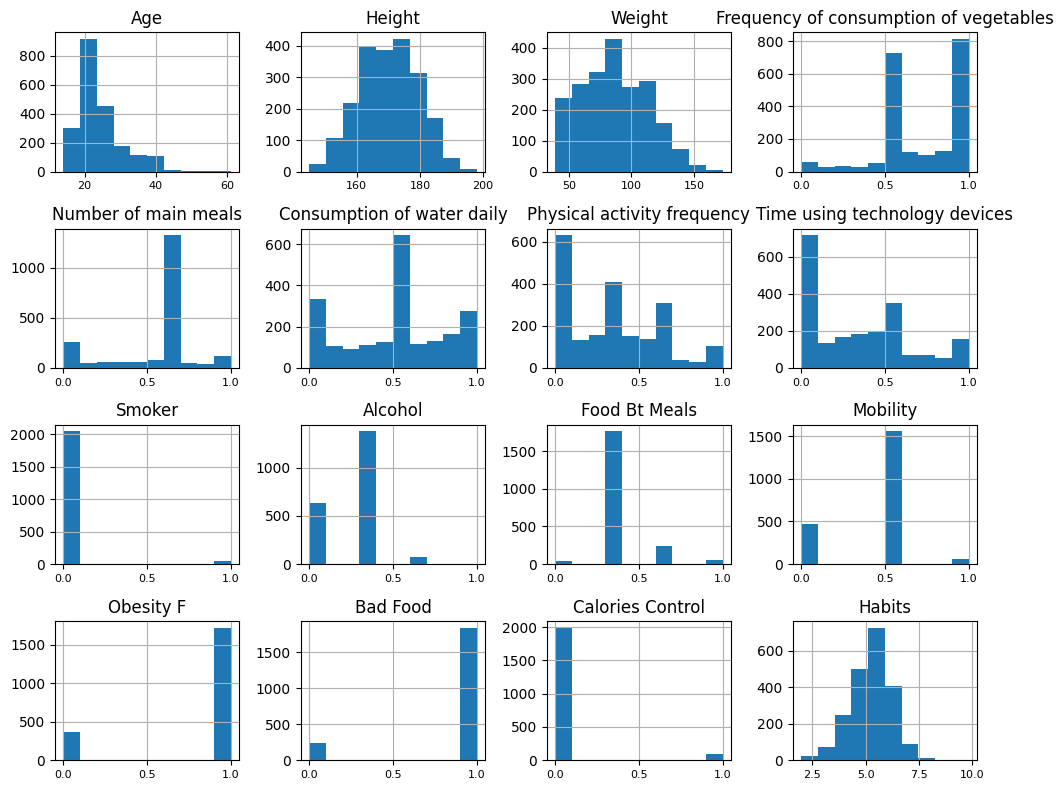

In [14]:
df2.hist(figsize=(10,8), xlabelsize=8)
plt.tight_layout()

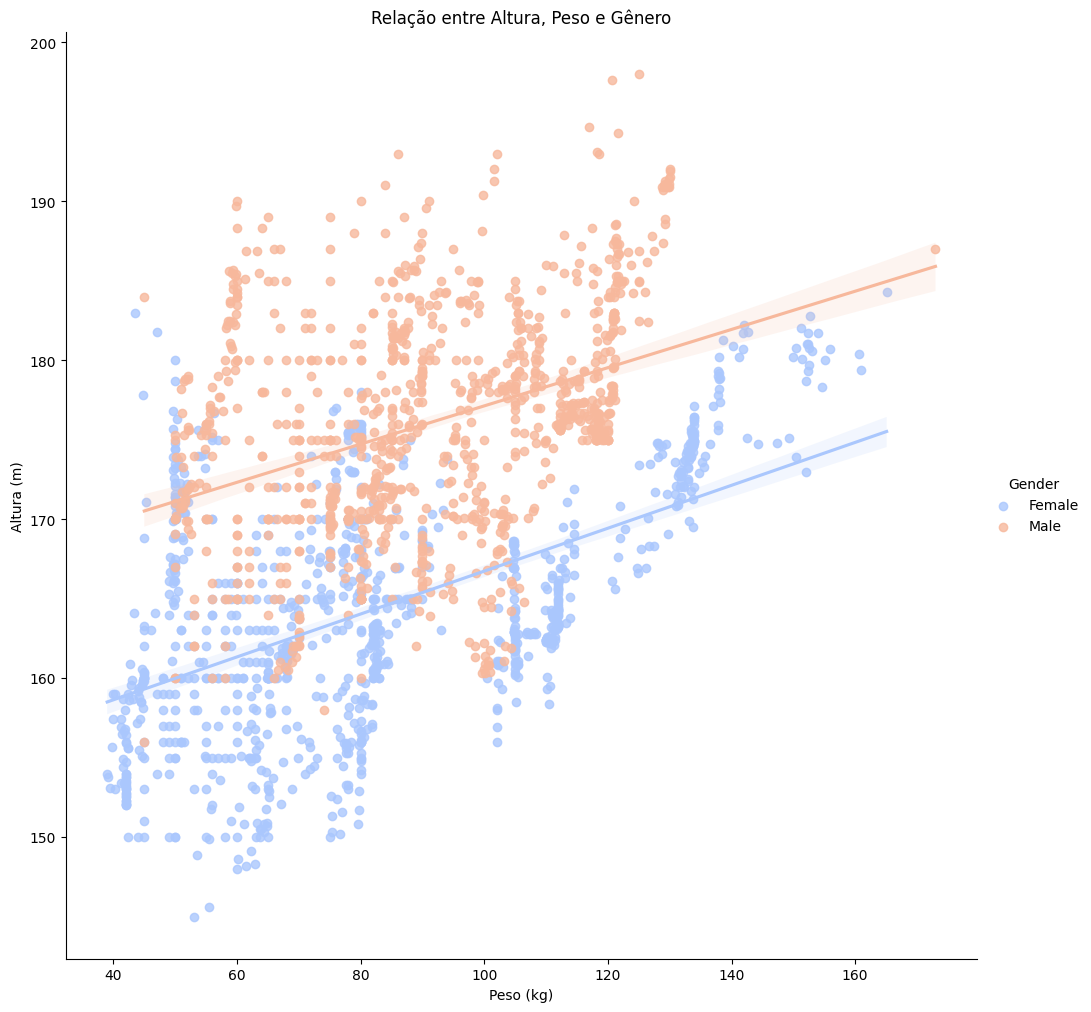

In [15]:
# Relação entre altura x peso - para cada gênero
sns.lmplot(x='Weight', y='Height', data=df2, hue=('Gender'), palette='coolwarm', height=10)
plt.title('Relação entre Altura, Peso e Gênero')
plt.xlabel('Peso (kg)')
plt.ylabel('Altura (m)')
plt.show()


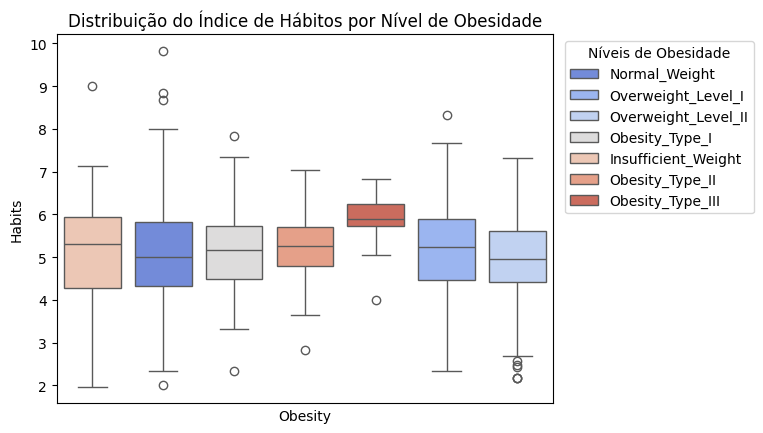

In [16]:
# Distribuição entre níveis de obesidade e hábitos
sns.boxplot(x='Obesity', y='Habits', hue='Obesity', legend=False, data=df2, order=sorted(df2['Obesity'].unique()), palette='coolwarm')
plt.title('Distribuição do Índice de Hábitos por Nível de Obesidade')
plt.xticks([])
plt.legend(title='Níveis de Obesidade', labels=df['Obesity'].unique(), bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

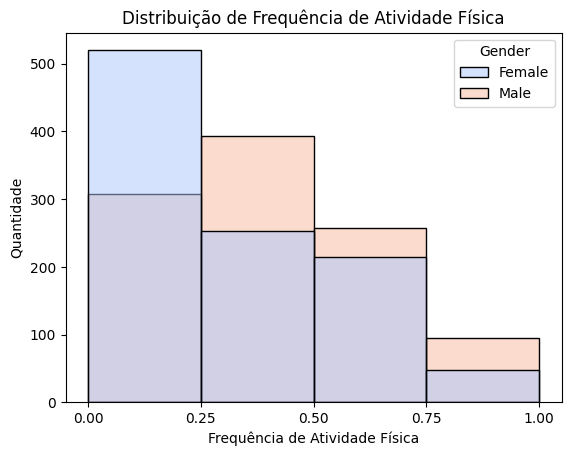

In [17]:
# Frequência de atividade física
# valores variando a cada 0,25: Não pratica, 1-2 dias, 2-4 dias, 4-5 dias)
sns.histplot(x=df2['Physical activity frequency'], kde=False, palette='coolwarm', hue=df2['Gender'], bins=4)
plt.title('Distribuição de Frequência de Atividade Física')
plt.xticks(np.arange(0, 1.25, 0.25))
plt.xlabel('Frequência de Atividade Física')
plt.ylabel('Quantidade')
plt.show()


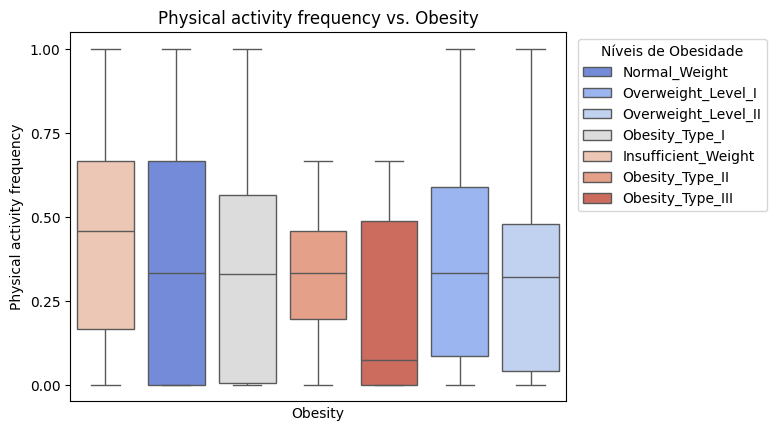

In [18]:
# Relação entre FAF e NObeyesdad
sns.boxplot(x='Obesity', y='Physical activity frequency', hue='Obesity', legend=False, data=df2, order=sorted(df2['Obesity'].unique()), palette='coolwarm')
plt.title('Physical activity frequency vs. Obesity')
plt.xticks([])
plt.yticks(np.arange(0, 1.25, 0.25))
plt.legend(title='Níveis de Obesidade', labels=df['Obesity'].unique(), bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()





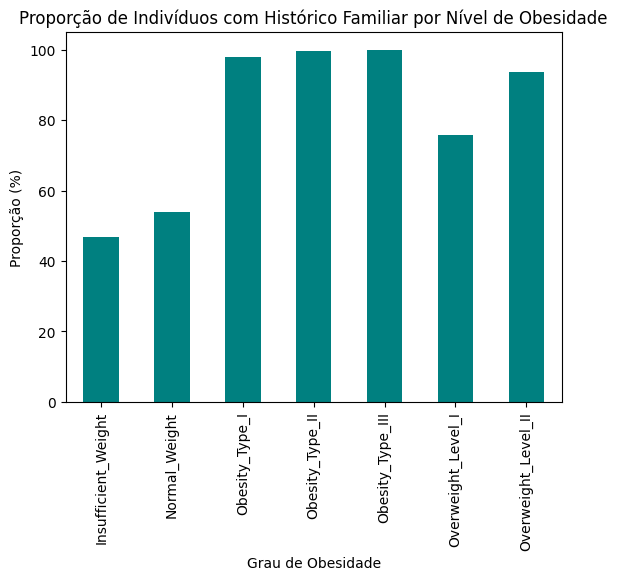

In [19]:
# Proporção por grupo de obesidade
family_history = df2.groupby('Obesity')['Obesity F'].mean().mul(100)

family_history.plot(kind='bar', color='teal')
plt.title('Proporção de Indivíduos com Histórico Familiar por Nível de Obesidade')
plt.ylabel('Proporção (%)',)
plt.xlabel('Grau de Obesidade')
plt.show()

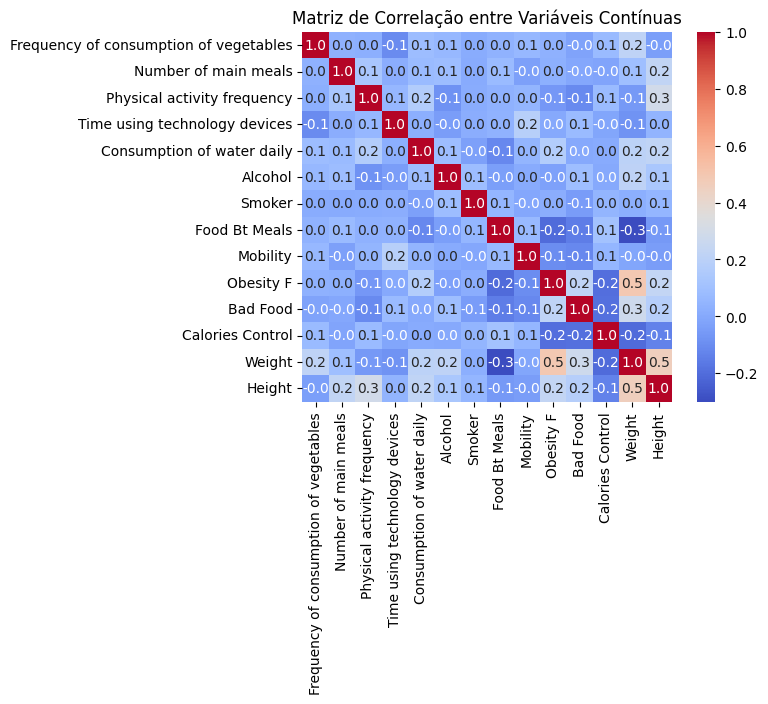

In [20]:
# Validando se há correlação entre as variáveis
# Adicionando as variávies peso e altura ao df de variáveis contínuas

continuous_vars.append('Weight')
continuous_vars.append('Height')

correlation_matrix = df2[continuous_vars].corr()

# Heatmap
#Grau de correção: 0.1 a 0.3 fraca; 0.3 a 0.5 moderada; 0.5 a 1 forte
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", square=True)
plt.title('Matriz de Correlação entre Variáveis Contínuas')
plt.show()

In [21]:
# Distribuição de IMC por Gênero
#sns.boxplot()

## DF 1 - Dados Qualitativos

In [22]:
df1 = df.copy() # nesse df trabalharemos sem a transformação das variáveis qualitativas

In [23]:
for x in ['Frequency of consumption of vegetables', 'Number of main meals', 'Physical activity frequency', 'Time using technology devices', 'Consumption of water daily']:
    df1[x] = df1[x].round(0)
    value = np.array(df1[x])
    print(f'{x}: Valores: {df1[x].unique()}')

Frequency of consumption of vegetables: Valores: [2. 3. 1.]
Number of main meals: Valores: [3. 1. 4. 2.]
Physical activity frequency: Valores: [0. 3. 2. 1.]
Time using technology devices: Valores: [1. 0. 2.]
Consumption of water daily: Valores: [2. 3. 1.]


In [24]:
df1['Frequency of consumption of vegetables'] = df1['Frequency of consumption of vegetables'].map({1: 'Never', 2: 'Sometimes', 3: 'Always'})
df1['Number of main meals'] = df1['Number of main meals'].map({1: '1', 2: '2', 3: '3', 4: '3+'})
df1['Physical activity frequency'] = df1['Physical activity frequency'].map({0: 'Never', 1: '1-2 days', 2: '2-4 days', 3: '4-5 days'})
df1['Time using technology devices'] = df1['Time using technology devices'].map({0: '0–2 hours', 1: '3-5 hours', 2: '+5 hours'})
df1['Consumption of water daily'] = df1['Consumption of water daily'].map({1: 'Less than a liter', 2: 'Between 1 and 2L', 3: 'More than 2L'})

df1.head()

,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,Sometimes,3,Sometimes,no,Between 1 and 2L,no,Never,3-5 hours,no,Public_Transportation,Normal_Weight
1,Female,21.0,152.0,56.0,yes,no,Always,3,Sometimes,yes,More than 2L,yes,4-5 days,0–2 hours,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,180.0,77.0,yes,no,Sometimes,3,Sometimes,no,Between 1 and 2L,no,2-4 days,3-5 hours,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,180.0,87.0,no,no,Always,3,Sometimes,no,Between 1 and 2L,no,2-4 days,0–2 hours,Frequently,Walking,Overweight_Level_I
4,Male,22.0,178.0,89.8,no,no,Sometimes,1,Sometimes,no,Between 1 and 2L,no,Never,0–2 hours,Sometimes,Public_Transportation,Overweight_Level_II


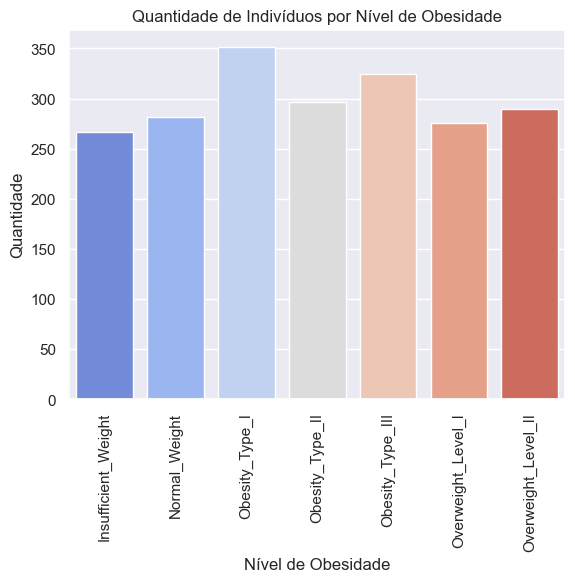

<Figure size 640x480 with 0 Axes>

In [89]:
# Contando a quantidade de indivíduos por nível de obesidade

obesity_count = df1['Obesity'].value_counts().sort_index()

#obesity_count.plot(kind='bar', color='teal')
sns.barplot(x=obesity_count.index, y=obesity_count.values, palette='coolwarm', hue=obesity_count.index, legend=False)
plt.title('Quantidade de Indivíduos por Nível de Obesidade')
plt.ylabel('Quantidade')
plt.xlabel('Nível de Obesidade')
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()

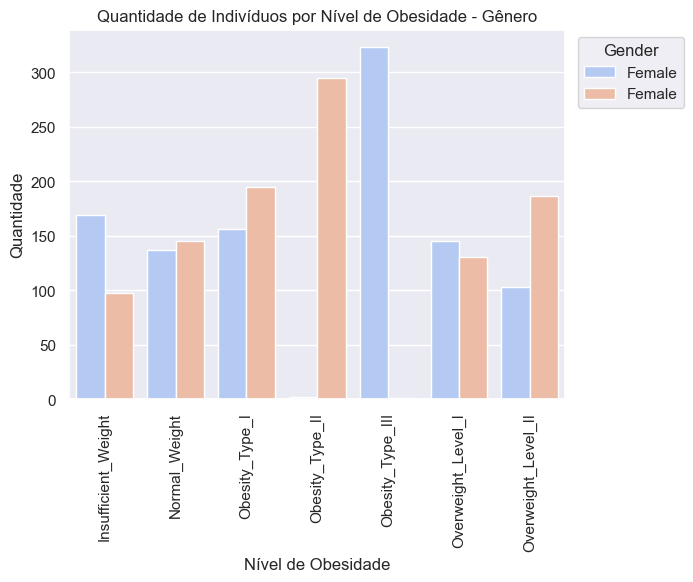

In [93]:
# Segregando os indivíduos por gênero - nível de obesidade
sns.countplot(x='Obesity', data=df1, palette='coolwarm', hue='Gender', legend=False, order=sorted(df1['Obesity'].unique()))
plt.title('Quantidade de Indivíduos por Nível de Obesidade - Gênero')
plt.ylabel('Quantidade')
plt.xlabel('Nível de Obesidade')
plt.xticks(rotation=90)
plt.legend(title='Gender',labels= df1['Gender'], bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()

In [35]:
df1.dtypes

Gender                                        object
Age                                          float64
Height                                       float64
Weight                                       float64
Family History with Overweight                object
Frequent consumption of high caloric food     object
Frequency of consumption of vegetables        object
Number of main meals                          object
Consumption of food between meals             object
Smoke                                         object
Consumption of water daily                    object
Calories consumption monitoring               object
Physical activity frequency                   object
Time using technology devices                 object
Consumption of alcohol                        object
Transportation used                           object
Obesity                                       object
dtype: object

In [ ]:
# Identificando os valores relacionados aos hábitos:
for x in df1.columns[4:-1]:
    value = df1[x].value_counts().index.to_list()
    count = df1[x].value_counts().to_list()
    dic = dict(zip(value, count))
    print(f'{x}: \n {dic}')

Family History with Overweight: 
 {'yes': 1722, 'no': 365}
Frequent consumption of high caloric food: 
 {'yes': 1844, 'no': 243}
Frequency of consumption of vegetables: 
 {'Sometimes': 994, 'Always': 991, 'Never': 102}
Number of main meals: 
 {'3': 1466, '1': 296, '2': 176, '3+': 149}
Consumption of food between meals: 
 {'Sometimes': 1761, 'Frequently': 236, 'Always': 53, 'no': 37}
Smoke: 
 {'no': 2043, 'yes': 44}
Consumption of water daily: 
 {'Between 1 and 2L': 1107, 'More than 2L': 502, 'Less than a liter': 478}
Calories consumption monitoring: 
 {'no': 1991, 'yes': 96}
Physical activity frequency: 
 {'1-2 days': 759, 'Never': 714, '2-4 days': 495, '4-5 days': 119}
Time using technology devices: 
 {'0–2 hours': 932, '3-5 hours': 912, '+5 hours': 243}
Consumption of alcohol: 
 {'Sometimes': 1380, 'no': 636, 'Frequently': 70, 'Always': 1}
Transportation used: 
 {'Public_Transportation': 1558, 'Automobile': 456, 'Walking': 55, 'Motorbike': 11, 'Bike': 7}


In [81]:
dic

{'Public_Transportation': 1558,
 'Automobile': 456,
 'Walking': 55,
 'Motorbike': 11,
 'Bike': 7}

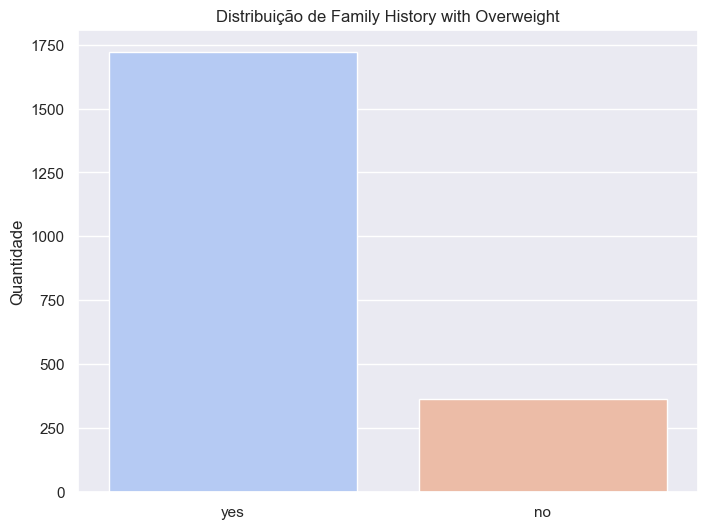

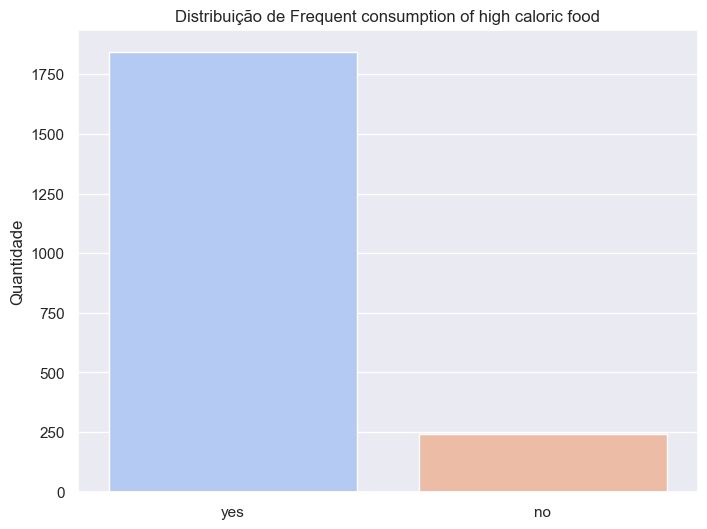

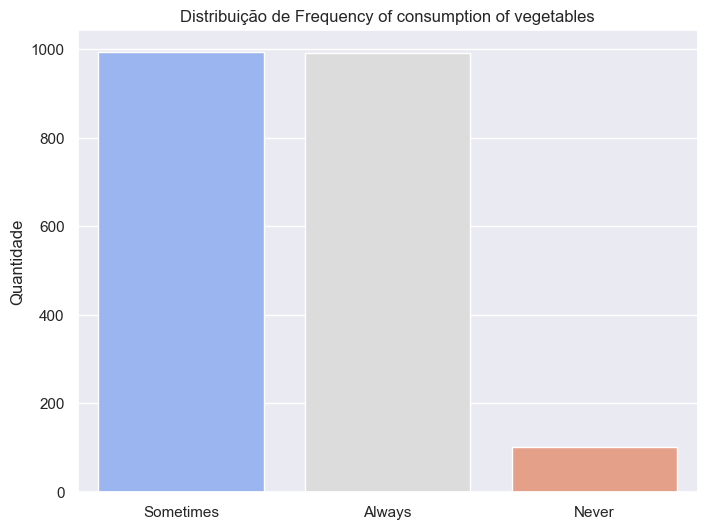

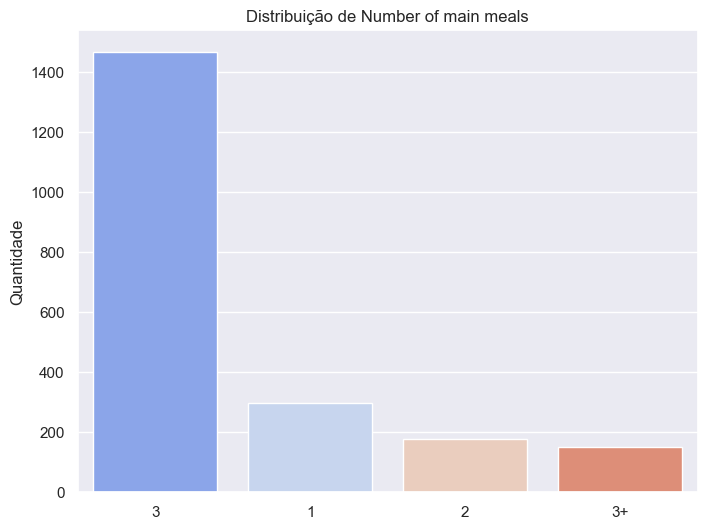

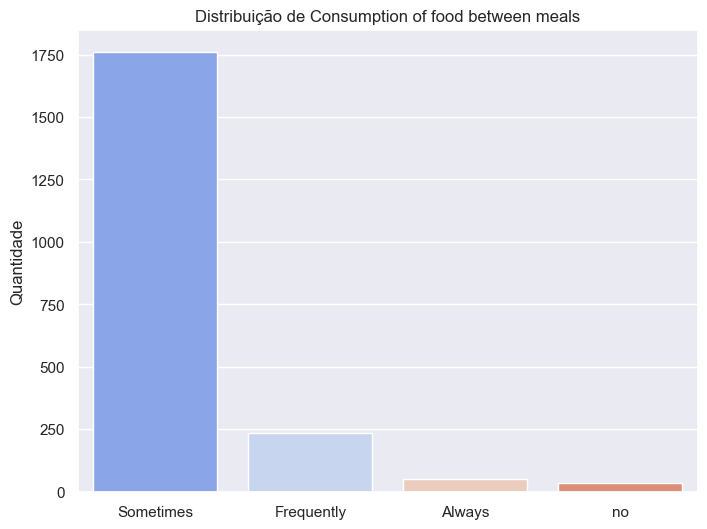

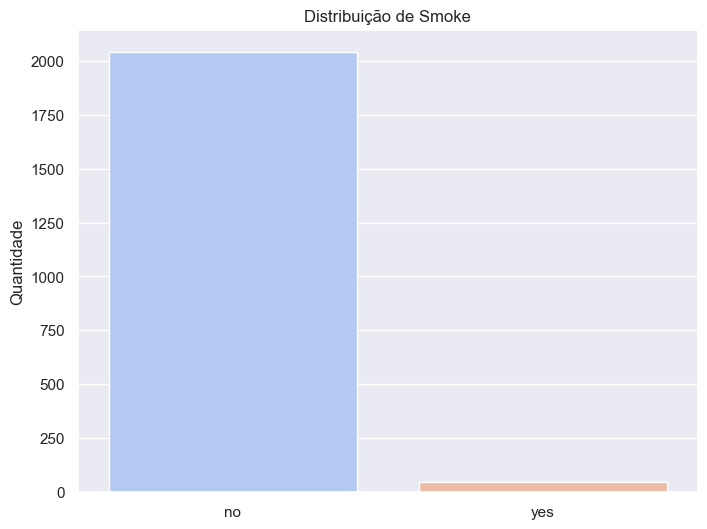

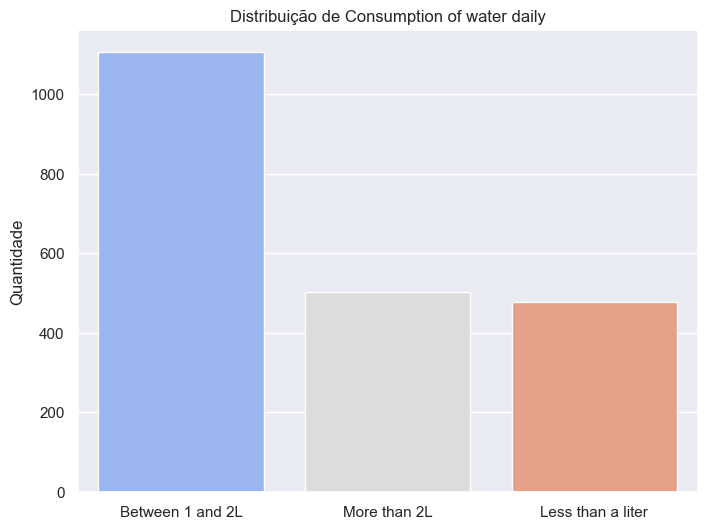

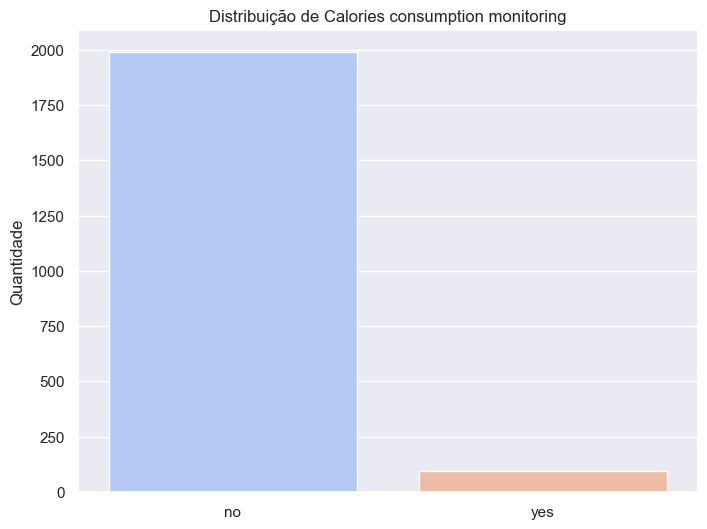

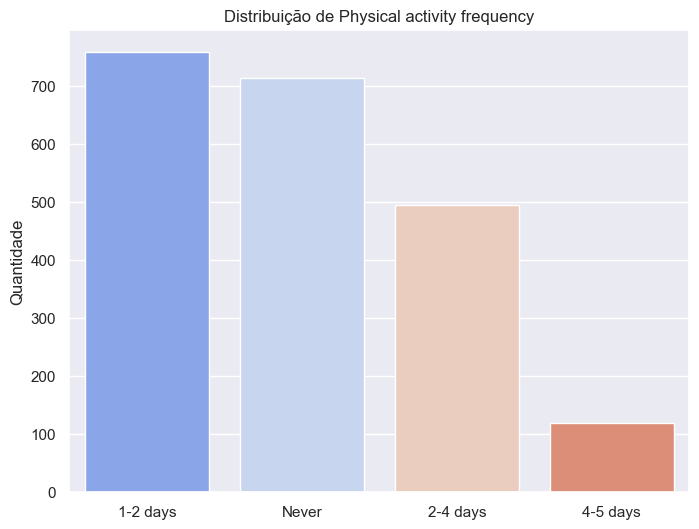

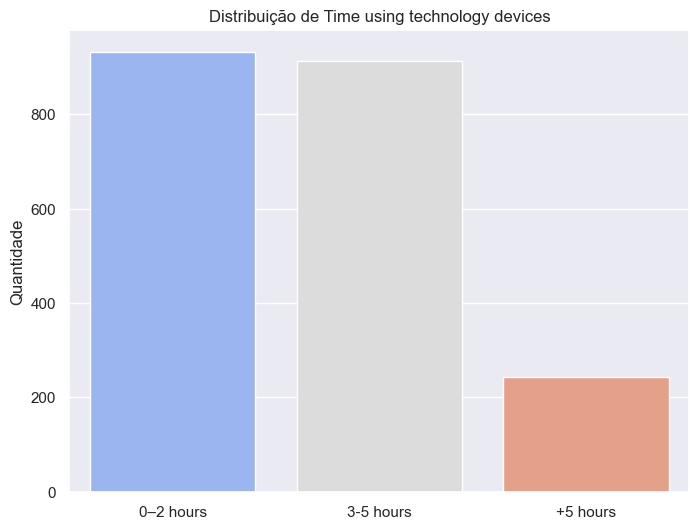

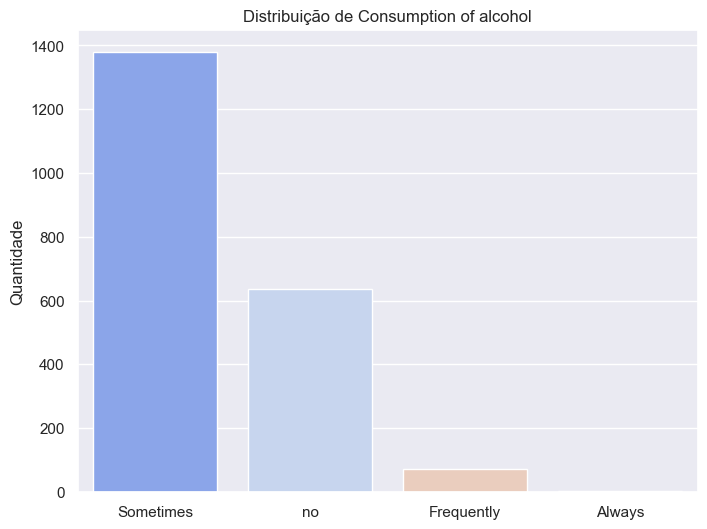

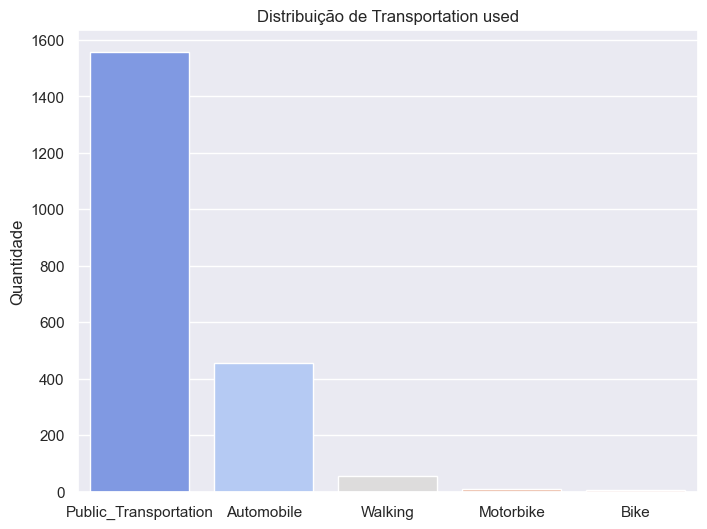

In [83]:
# Plotando váriveis qualitativas - EDA
for x in df.columns[4:-1]:
    plt.figure(figsize = (8,6))
    ax = sns.barplot(x=df1[x].value_counts().index.to_list(), y=df1[x].value_counts().to_list(), palette='coolwarm', hue=df1[x].value_counts().index.to_list(), legend=False)

    plt.title(f'Distribuição de {x}')
    plt.ylabel('Quantidade')
    